**Importing the libraries and loading the data**

In [1]:
# some basic libraries

import sys
!{sys.executable} -m pip install gdown

import pandas as pd
import os
import gdown
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import io

# some libraries useful for text pre-processing and text data exploration
import re, string
%pip install pyLDAvis

# Import necessary libraries
import gensim
import pyLDAvis
import pyLDAvis.gensim_models
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from bs4 import BeautifulSoup
from wordcloud import WordCloud

# some libraries for for model-building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# some libraries for feature extraction from texts
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer #bag of words
from gensim.models import Word2Vec #word embedding


Defaulting to user installation because normal site-packages is not writeable


/Users/jaelynliou/Library/Python/3.8/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jaelynliou/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jaelynliou/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
url = 'https://drive.google.com/file/d/1r5xDdeOsuwUDZy_1GVNf_hS8vxQ7LtEV/view?usp=share_link'

# Extract file ID from the URL
file_id = url.split('/')[-2]

# Construct the download URL
dwn_url = f'https://drive.google.com/uc?id={file_id}'

# Download the file
output = 'complaints.csv'
# gdown.download(dwn_url, output, quiet=False)

# Download only if file doesn't already exist
if not os.path.exists(output):
    gdown.download(dwn_url, output, quiet = False)
else:
    print("File already exists. Skipping download.")

# Read the downloaded CSV file into a DataFrame
data = pd.read_csv(output)

data.head()


/Users/jaelynliou/Library/Python/3.8/lib/python/site-packages/gdown/download.py:39: DeprecationWarning: Call to deprecated method findChildren. (Replaced by find_all) -- Deprecated since version 3.0.0.
  for param in form.findChildren("input", attrs={"type": "hidden"}):
Downloading...
From (original): https://drive.google.com/uc?id=1r5xDdeOsuwUDZy_1GVNf_hS8vxQ7LtEV
From (redirected): https://drive.google.com/uc?id=1r5xDdeOsuwUDZy_1GVNf_hS8vxQ7LtEV&confirm=t&uuid=673a07e4-b36c-47df-a280-8c32728449f1
To: /Users/jaelynliou/Documents/AI Summer Institute/Final Project/complaints.csv
100%|██████████| 2.17G/2.17G [01:05<00:00, 33.3MB/s]


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2022-12-25,Credit card or prepaid card,Gift card,Unexpected or other fees,NaN,NaN,NaN,Incomm Holdings Inc.,NY,11576.0,NaN,NaN,Web,2022-12-25,Untimely response,No,NaN,6358716
1,2022-10-17,Credit card or prepaid card,Store credit card,Closing your account,Can't close your account,NaN,NaN,"Bread Financial Holdings, Inc.",PA,19610.0,NaN,NaN,Web,2023-01-03,Closed with explanation,Yes,NaN,6096325
2,2023-01-10,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",PA,19127.0,NaN,NaN,Web,2023-01-10,In progress,Yes,NaN,6413829
3,2022-12-31,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,MO,63033.0,NaN,Consent not provided,Web,2022-12-31,Closed with non-monetary relief,Yes,NaN,6382980
4,2022-12-29,Credit card or prepaid card,General-purpose prepaid card,Unexpected or other fees,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,CA,90746.0,NaN,NaN,Web,2022-12-29,Closed with explanation,Yes,NaN,6375967


In [3]:
data['Company'].value_counts() # # Counts the number of occurrences of each unique value in the 'Company' column

Company
EQUIFAX, INC.                                    562111
TRANSUNION INTERMEDIATE HOLDINGS, INC.           467190
Experian Information Solutions Inc.              436041
BANK OF AMERICA, NATIONAL ASSOCIATION            121461
WELLS FARGO & COMPANY                            103010
                                                  ...  
Commonwealth Auto Credit, LLC                         1
REVERSE e MORTGAGE LLC Dba CrossPoint Funding         1
Gregg & Gregg, P.C.                                   1
Nationwide TFS, LLC                                   1
BAY VALLEY                                            1
Name: count, Length: 6611, dtype: int64

In [4]:
# Filters the dataset to only include rows where the 'Company' column is exactly 'CITIBANK, N.A.'
citigroup_data = data[data['Company'] == 'CITIBANK, N.A.']

# Displays the first 5 rows of the filtered DataFrame to preview the data
citigroup_data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
55,2022-12-30,"Money transfer, virtual currency, or money ser...",Domestic (US) money transfer,Other transaction problem,NaN,A Wire transfer of {$23000.00} was initiated o...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",CA,91730.0,NaN,Consent provided,Web,2022-12-30,Closed with explanation,Yes,NaN,6378719
75,2022-12-26,Checking or savings account,Checking account,Closing an account,Can't close your account,My father passed away on XX/XX/2022. I informe...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",WA,98102.0,NaN,Consent provided,Web,2022-12-26,Closed with explanation,Yes,NaN,6361109
80,2022-12-25,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,"Back in XXXX of 2021, I bought a XXXXXXXX XXXX...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",SC,29072.0,NaN,Consent provided,Web,2022-12-25,Closed with monetary relief,Yes,NaN,6359652
154,2022-12-28,Credit card or prepaid card,Store credit card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,I am a platinum card holder with Macys. I gene...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",DC,20012.0,NaN,Consent provided,Web,2022-12-28,Closed with explanation,Yes,NaN,6368493
234,2022-12-07,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,I disputed the unknown inquires and the compan...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",MD,20743.0,NaN,Consent provided,Web,2022-12-30,Closed with explanation,Yes,NaN,6286123


Timely response?
Yes    80158
No       369
Name: count, dtype: int64


<Axes: xlabel='Timely response?', ylabel='count'>

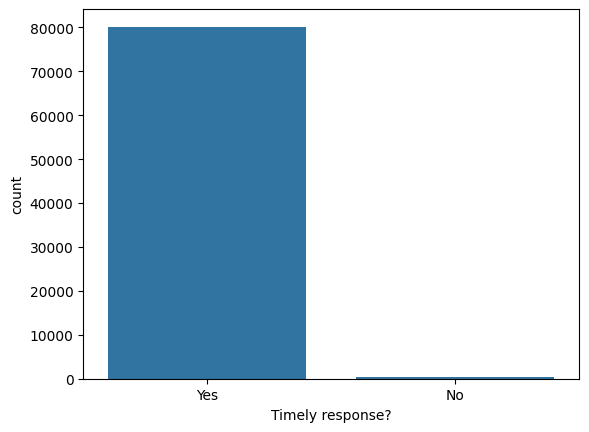

In [5]:
# Counts the number of 'Yes' and 'No' (or other unique values) in the 'Timely response?' column of the Citibank data
x = citigroup_data['Timely response?'].value_counts()

# Prints the count of each response category (e.g., how many timely and untimely responses)
print(x)

# Creates a bar plot to visualize the count of timely responses
sns.barplot(x=x.index, y=x)  # x-axis: response categories ('Yes', 'No'), y-axis: their counts


Consumer disputed?
No     28071
Yes     6697
Name: count, dtype: int64


<Axes: xlabel='Consumer disputed?', ylabel='count'>

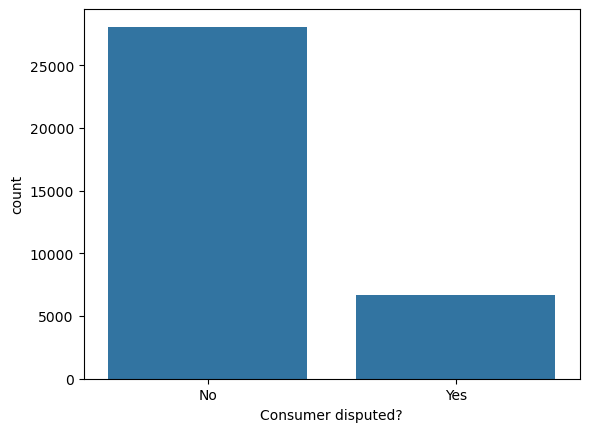

In [ ]:
# Counts how many times each unique value (e.g., 'Yes', 'No') appears in the 'Consumer disputed?' column
x = ???

# Prints the result — the number of disputed vs. non-disputed complaints
print(x)

# Plots a bar chart showing how often consumers disputed the complaint resolution
sns.barplot(x=x.index, y=x)  # x-axis: dispute categories ('Yes', 'No'), y-axis: number of cases


Product
Credit card or prepaid card                                                     22092
Credit card                                                                     16817
Mortgage                                                                        10249
Checking or savings account                                                      8967
Credit reporting, credit repair services, or other personal consumer reports     7868
Debt collection                                                                  6859
Bank account or service                                                          4450
Money transfer, virtual currency, or money service                                844
Consumer Loan                                                                     765
Student loan                                                                      737
Credit reporting                                                                  267
Payday loan, title loan, or personal loan     

<Axes: title={'center': 'Count of Different Products'}, xlabel='Product', ylabel='count'>

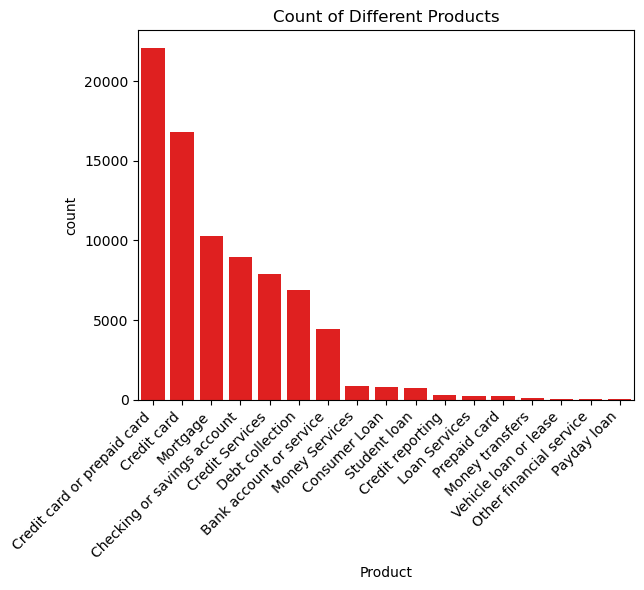

In [ ]:
# Count the number of occurrences of each product type in Citibank complaints
x = citigroup_data['Product'].value_counts()

# Print the frequency of each product to the console
print(x)

# Rotate x-axis labels by 45 degrees to avoid overlapping and align them to the right
plt.xticks(rotation=45, ha='right')

# Set a title for the bar chart
plt.title("Count of Different Products", color='black')

# Create a dictionary to rename long or grouped product labels for better readability
new_labels = {
    'Credit reporting, credit repair services, or other personal consumer reports': 'Credit Services',
    'Money transfer, virtual currency, or money service': 'Money Services',
    'Payday loan, title loan, or personal loan': 'Loan Services'
}

# Create a barplot using seaborn to show the count of each product
ax = sns.barplot(x=x.index, y=x)

# Get the current x-axis labels from the plot
current_labels = [item.get_text() for item in ax.get_xticklabels()]

# Replace long labels with simplified versions using the dictionary (if a match exists)
updated_labels = [new_labels.get(label, label) for label in current_labels]

# Apply the updated, shortened labels to the x-axis
ax.set_xticklabels(updated_labels)

# Plot another barplot with red color overlay
sns.barplot(x=x.index, y=x, color='red')  # This creates a second red barplot on top


Consumer consent provided?
Consent provided        29628
Consent not provided    18006
Other                     999
Consent withdrawn         188
Name: count, dtype: int64


<Axes: xlabel='Consumer consent provided?', ylabel='count'>

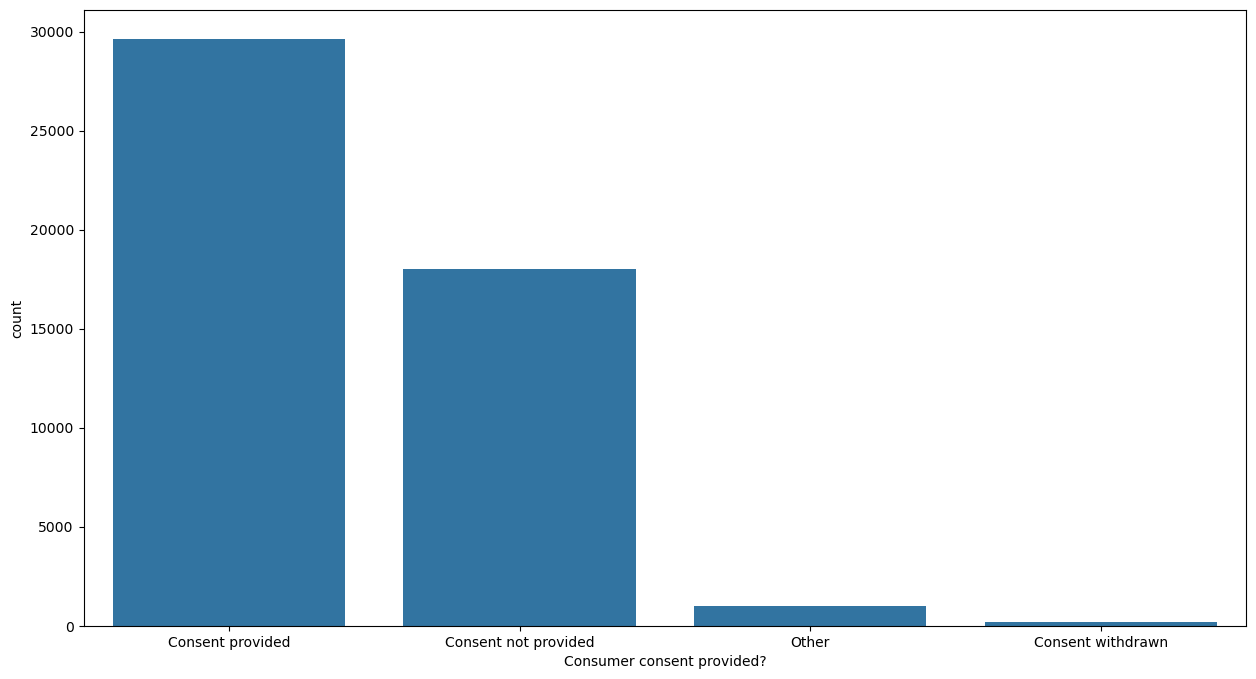

In [ ]:
# Count how many times each unique value appears in the 'Consumer consent provided?' column
x = citigroup_data['Consumer consent provided?'].value_counts()

# Print the result to see the exact counts (e.g., 'Yes', 'No', 'N/A')
print(x)

# Set the size of the figure to make the plot larger and more readable (15 inches wide, 8 inches tall)
plt.figure(figsize=(15, 8))

# Create a bar plot to visualize the distribution of consumer consent statuses
sns.barplot(x=x.index, y=x)  # x-axis: categories of consent, y-axis: their counts

In [ ]:
# Count the number of complaints sent to the company on each unique date
x = citigroup_data['Date sent to company'].value_counts()

# Print the counts to see how many complaints were sent on each date
print(x)

Date sent to company
2012-06-21    96
2021-12-03    78
2020-06-25    71
2016-06-30    61
2018-04-28    61
              ..
2013-05-05     1
2014-09-07     1
2013-06-02     1
2013-03-30     1
2015-06-21     1
Name: count, Length: 3919, dtype: int64


**Pre text processing**

Stemming

In [ ]:
def text_stemming(text):
    # Convert the input to string in case it isn't (to avoid errors)
    text = str(text)

    # Initialize the Porter stemmer from NLTK (used to reduce words to their root form)
    stemmer = nltk.porter.PorterStemmer()

    # Split the text into individual words (tokens), stem each token, then join back into a single string
    stemmed = ???

    # Return the stemmed version of the text
    return stemmed